# Segment of the Moment

By
Ram Subramanyam, Ph.D.<br /> 
Associate Professor of Business Administration<br /> 
William N. Scheffel Faculty Fellow, Gies College of Business<br />
University of Illinois at Urbana-Champaign

# Learning Objectives of the Case

* Understanding summarized sales data<br />
* Performing descriptive analysis<br />
* Making data transformations to perform unsupervised clustering<br />
* Create simple visualizations to assess generated clusters<br />

# Case Background: MiddleOfEverywhere Resale Inc.

You are hired as a Business Analyst by a midwestern wholesale firm - MiddleOfEveryWhere Resale Inc, which specializes in stocking and selling grocery (some perishable) and non-perishable products. This firm has numerous agreements with retailers and resellers from the neighboring districts. As a wholesale firm, you mainly stock  popular brands of rice/grains, chocolate, and alcoholic drinks. In the non-food category, you stock popular paper products, clothing items such as T-shirts and sportswear, and convenience-oriented electronic goods. While you know that there are many retailers who buy from you, there are also local agents (resellers) that seem to buy these products from you. 

Your sales team is finding it difficult to come up with promotions and advertising targeting specific customer groups since they lack passed-down wisdom about the different types of customers they serve. They have been able to compile clean aggregate sales data but they seek your advise on the next steps. 

As a Business Analyst who has recently graduated, you are aware that a simple customer segmentation exercise (unsupervised learning) might be a good first step in helping your marketing team approach promotions and advertising in a systematic way. In sum, you are aware that computers are incredibly powerful in helping see through large volumes of data to recognize patterns that might help decision makers understand partitions of data better. Furthermore, you know that as data changes over time, your firm would like the customer segments to be malleable enough and change over time.

The basic idea is that you are partitioning sales data into homogenous groups that are similar within a group and differ considerably from other groups that are observed in the dataset.

You have taken enough Python coursework to take a first pass at generating customer segments from sales data. You have been given their (anonymized) recent sales data to start off the effort.


# Computing Environment & Libraries

First, you load the necessary libraries that will help you perform summarization of data and, later, advanced computational operations. Before you jump into identification of customer segments (through clustering), you want to load the dataset and observe some summarized statistics. You are aware that the "sklearn" library has the clustering commands that you can invoke. You are also aware of the "pandas" library that enables data operations.

In [7]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))


Python version: 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]
pandas version: 1.2.4
NumPy version: 1.20.1
SciPy version: 1.6.2
IPython version: 7.22.0
scikit-learn version: 0.24.1


The libraries seem to have loaded fine. However, you want to ensure that the output of visuals/plots that you generate are shown inline just below the commands. So you invoke the following:

In [8]:
%matplotlib inline

# Read the Dataset

In this case, the dataset is already available on the same folder as this .ipynb (IPython notebook) file. If the dataset is located elsewhere on the computer, please use a "%cd  TheFileLocationWhereYouSavedTheDataset" command with the appropriately typed file path.

Here, you will be reading the Wholesale order quantities dataset in a dataframe using Pandas.

In [9]:
wholesale_df = pd.read_csv("wholesale_quantities.csv") 

Everytime, you load a dataset into a dataframe, you want to check if the operation performed correctly. The simplest way is to check the first few rows of the dataset and see if the dataset loaded correctly. The head( ) dataframe function does this job well.

In [10]:
wholesale_df.head()

,Retail1Agent0,RiceGrains,PaperProducts,Alcohol,Clothing,Electronics,Chocolate
0,0,26605,7242,9451,375,3744,1204
1,0,14820,7358,11960,3084,4610,1598
2,0,13341,6606,9605,4209,4922,7060
3,1,27857,897,5276,11207,710,1609
4,0,47492,4058,8998,6851,2488,4667


Here, the dataset seems to have 7 columns with the first one indicating whether the aggregate quantity in the transaction represents a Retail store transaction or a reselling-agent transaction (the variable/field called "Retail1Agent0"). The other fields seem to represent various product category quantities that pertain to a transaction.

# Variable Descriptive Statistics

A more useful data summarization command is the describe( ) command that shows you what the summarized statistics look like for each variable in the dataset. You want to pay attention to the minimum, maximum, median, and so on...

In [11]:
wholesale_df.describe()

,Retail1Agent0,RiceGrains,PaperProducts,Alcohol,Clothing,Electronics,Chocolate
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.677273,25200.675000,4347.295455,9939.234091,5376.018182,4034.084091,1372.440909
std,0.468052,26559.396292,5535.277571,11878.976961,8495.684816,6674.982284,2538.115509
min,0.000000,6.000000,41.000000,4.000000,44.000000,4.000000,3.000000
25%,0.000000,6568.500000,1150.250000,2691.500000,1299.000000,359.500000,367.250000
50%,1.000000,17858.500000,2720.500000,5944.500000,2670.500000,1143.000000,869.000000
75%,1.000000,35560.750000,5392.750000,13320.000000,6220.250000,5491.000000,1638.250000
max,1.000000,235517.000000,55124.000000,115975.000000,106521.000000,57158.000000,43149.000000


Of course, you would like to glimpse at whether there are correlations among the key variables that you are looking it. Pearson correlations might come in handy for this purpose. First, let us load the pearsonr library that is part of scipy python package.

In [29]:
from scipy.stats.stats import pearsonr

# Pearson Pairwise Correlations

Here, we first examine pairwise correlation between the binary variable Retail1Agent0 and the first product category field 'RiceGrains'.

In [30]:
print(pearsonr(wholesale_df['Retail1Agent0'],wholesale_df['RiceGrains']))

(0.16917190429811974, 0.00036495700244943433)



It is a good idea to analyze correlations for the rest of the product category fields with the Retail transaction binary variable. For example

In [31]:
print(pearsonr(wholesale_df['Retail1Agent0'],wholesale_df['RiceGrains']))
print(pearsonr(wholesale_df['Retail1Agent0'],wholesale_df['PaperProducts']))
print(pearsonr(wholesale_df['Retail1Agent0'],wholesale_df['Alcohol']))
print(pearsonr(wholesale_df['Retail1Agent0'],wholesale_df['Clothing']))
print(pearsonr(wholesale_df['Retail1Agent0'],wholesale_df['Electronics']))
print(pearsonr(wholesale_df['Retail1Agent0'],wholesale_df['Chocolate']))

(0.16917190429811974, 0.00036495700244943433)
(-0.4607155448869854, 1.6669826532410426e-24)
(-0.6087923659410455, 5.69545225012513e-46)
(0.20204510196300357, 1.953007800591595e-05)
(-0.6360254380541559, 2.9554051378457985e-51)
(-0.05601219957214783, 0.24099627137276572)


As you can see from the correlations, there is strong positive relationship between the RetailerAgent binary variable and (a) Rice&Grains purchase quantities, (b) Clothing. Further, you can see that the same binary variable is negatively related to (i) Paper products, (ii) Alcohol quantity, and (iii) Electronic goods. The RetailerAgent binary variable's relationship with Chocolate purchases does not seem to be significant.

# K-Means Clustering

As a starting point for marketing tasks, it makes sense to explore whether there are meaningful homogenous subsets ("Clusters") in the sales data that emerge from the transaction data. This technique falls under unsupervised learning.

Visit page:(1) https://en.wikipedia.org/wiki/K-means_clustering for the Wikipedia entry OR (2) https://mahout.apache.org/users/clustering/k-means-clustering.html to understand the basics of the K-Means algorithm 

Or Visit this page
http://varianceexplained.org/r/kmeans-free-lunch/ by David Robinson (DataCamp) for a good discussion of intricacies of the k-Means algorithm... 

Let us make two copies of the dataset for our clustering analysis and import the necessary libraries 

In [12]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans

whlsl_df = pd.read_csv("wholesale_quantities.csv") #Reading the Whole Sale Customer dataset again in a 
# dataframe using Pandas

#Make a copy of the dataframe before we start a transformation
whlsl_df_tr = whlsl_df

The clustering algorithm requires the data to be in a 0-1 normalized space free from limits imposed by units/scales of the different variables. While all the columns of the dataset are being transformed and the line below might be unnecessary, it is a good idea to have a placeholder and then store the Z-Score transformed dataframe into a new dataframe object... If the dataset it too big and you need to only use a few fields for the clustering operation, this is the place to save the subset in a new dataframe

In [32]:
#Standardize
clmns = ['Retail1Agent0', 'RiceGrains','PaperProducts', 'Alcohol', 'Clothing', 'Electronics', 'Chocolate']
whlsl_df_tr_std = stats.zscore(whlsl_df_tr[clmns])

# Choose the Number of Clusters and apply K-Means

Here is the most important "Trial and Error" decision you need to make. For simple low-dimensional sales data, it might be good to start with 3 to 5 clusters. A simple idea is to choose the number of clusters equivalent to the number on which you can act on as a decision maker. Here specifically, I have chosen K=4

Here is the Stackoverflow discussion on this topic: if interested
https://stackoverflow.com/questions/1793532/how-do-i-determine-k-when-using-k-means-clustering

In [34]:
#Cluster the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(whlsl_df_tr_std)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

## Finding the Optimal K for KMeans Clustering

In [20]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [22]:
standardized_data = whlsl_df_tr_std #making a copy of the Normalized z-score data for the Elbow optimization
SSD = []
Range = range(1,10)
for k in Range:
    kmean = KMeans(n_clusters = k)
    kmean = kmean.fit(standardized_data)
    SSD.append(kmean.inertia_)

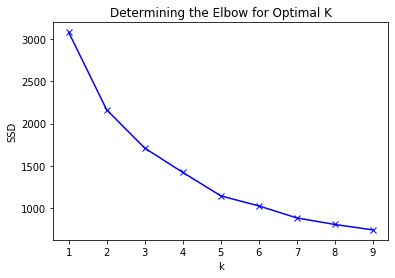

In [23]:
plt.plot(Range, SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('SSD')
plt.title('Determining the Elbow for Optimal K')
plt.show()

### Append the clusters column to the Dataset

Append the cluster labels into the original or the pre-transformation dataset

In [5]:
#Glue back to original data
whlsl_df_tr['Clusters'] = labels

NameError: name 'labels' is not defined

In [6]:
#Add the column into our list
clmns.extend(['Clusters'])

NameError: name 'clmns' is not defined

Cluster labels currently are '0', '1', '2', and '3'. Of course, if K changes, the numbers will change

In [17]:
#Lets analyze the clusters
print (whlsl_df_tr[clmns].groupby(['Clusters']).mean())

          Retail1Agent0     RiceGrains  PaperProducts       Alcohol  \
Clusters                                                              
0              0.000000   33526.500000   26031.500000  60671.500000   
1              0.996622   27320.087838    2379.797297   4778.486486   
2              0.750000  109246.250000   23772.000000  23113.750000   
3              0.000000   17148.469231    6561.438462  17382.007692   

              Clothing   Electronics     Chocolate  
Clusters                                            
0          5345.700000  34825.200000   2648.700000  
1          5997.368243   1085.287162   1104.800676  
2         52195.000000   3778.750000  17690.750000  
3          2523.000000   8387.576923   1381.561538  


# Try to understand cluster centroid values shown

A quick look above tells us that in Cluster '0', the center seems to be occupied by an Agent who purchases high quantities of Alcohol, Paper and Electronics goods (based on sample means of these quantities). Marketing Takeaway: It might be wise to approach this client with specific promotions or holiday time window offers. As these are non-perishables and few products under these categories might probably serve as good gift items. One possibility is a holiday-timed promotion for reselling agents that might attract their interest...

# Exercise

Try to think of explanations of the other cluster centroids. If you are not convinced that there is something intuitive there, try K=3 and K=5 or 6 and see if there is a clear separation that gives you the AHA moment...


An Easy way to understand cluster results is to perform exploratory bivariate plots using the transformed data. Two dimensions at a time is easier to understand when we attempt to breakdown the intuition behind generated clusters. 

First, let us analyze the category - Rice & Grains, and the Paper Products category and see how the clusters appear

[[-1.44865163e+00  3.13836287e-01  3.92191493e+00  4.27562195e+00
  -3.57271883e-03  4.61816440e+00  5.03409659e-01]
 [ 6.83070908e-01  7.98898195e-02 -3.55851670e-01 -4.34938305e-01
   7.32203890e-02 -4.42271370e-01 -1.05568438e-01]
 [ 1.55559907e-01  3.16804055e+00  3.51325033e+00  1.11032394e+00
   5.51718632e+00 -3.82959427e-02  6.43661970e+00]
 [-1.44865163e+00 -3.03522397e-01  4.00461106e-01  6.27263254e-01
  -3.36201948e-01  6.52952809e-01  3.59755550e-03]]


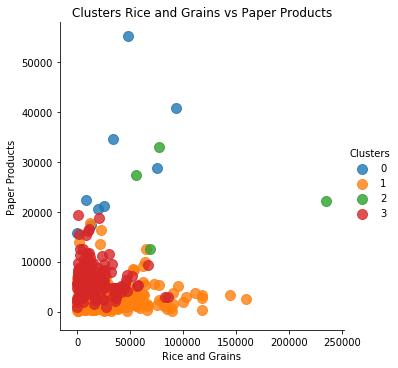

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing 5 axes (representing the variables) is going to be hard
# So, we will visualize two variables at a time

#Scatter plot of Rice&Grains and Paper Products
sns.lmplot('RiceGrains', 'PaperProducts', 
           data=whlsl_df_tr, 
           fit_reg=False, 
           hue="Clusters",  
           scatter_kws={"marker": "o", 
                        "s": 100})
plt.title('Clusters Rice and Grains vs Paper Products')
plt.xlabel('Rice and Grains')
plt.ylabel('Paper Products')

# Plot the centroids as a blue X
print(centroids)

Interpretation: The plot seems to indicate that the '0' cluster members (in BLUE) seem to purchase high amounts of Paper products and low amounts of Rice & Grains; Similarly, the '1" cluster members (in ORANGE) seem to buy more Rice and Grains products and low to medium quantities of Paper Products. 

The same '0' cluster you will see below is associated with higher quantities of alcohol purchases, and electronics good purchases, and lower quantities of Chocolate. Further, it seems to be of type "Agent" rather than a retailer.


# Homework

Below, I have tried to create few more bivariate plots for other variables to understand our generated clusters.

Try to think of what the graphs are telling you... You might need to spend a lot of time and thought on it. Remember, that the algorithm required you to pick the number of clusters. We interpreted Cluster '0' above. This cluster of customers can be approached with targeted offers, if desired.

Text(27.255989583333346, 0.5, 'Retailer1_Agent0')

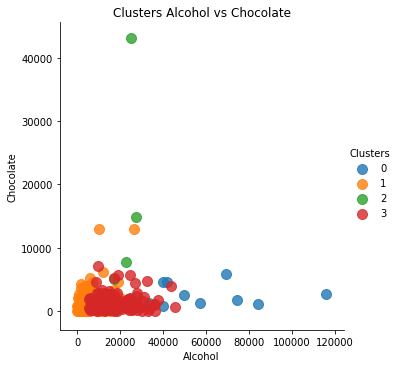

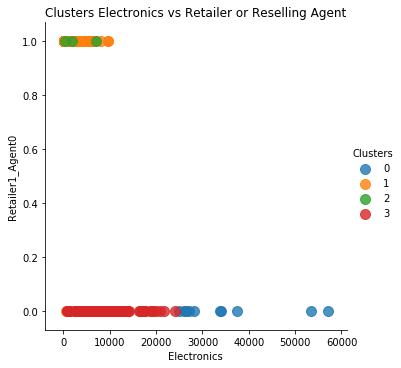

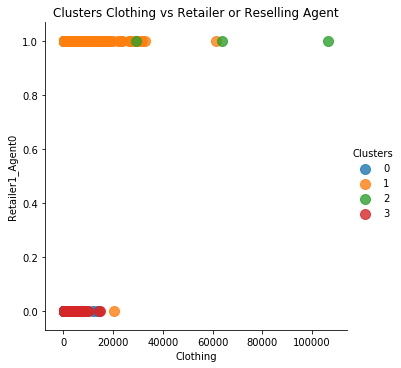

In [19]:

#Scatter plot of Alcohol and Chocolate
sns.lmplot('Alcohol', 'Chocolate', 
           data=whlsl_df_tr, 
           fit_reg=False, 
           hue="Clusters",  
           scatter_kws={"marker": "o", 
                        "s": 100})
plt.title('Clusters Alcohol vs Chocolate')
plt.xlabel('Alcohol')
plt.ylabel('Chocolate')

#Scatter plot of Electronics and Retailers
sns.lmplot('Electronics', 'Retail1Agent0', 
           data=whlsl_df_tr, 
           fit_reg=False, 
           hue="Clusters",  
           scatter_kws={"marker": "o", 
                        "s": 100})
plt.title('Clusters Electronics vs Retailer or Reselling Agent')
plt.xlabel('Electronics')
plt.ylabel('Retailer1_Agent0')

#Scatter plot of Electronics and Retailers
sns.lmplot('Clothing', 'Retail1Agent0', 
           data=whlsl_df_tr, 
           fit_reg=False, 
           hue="Clusters",  
           scatter_kws={"marker": "o", 
                        "s": 100})
plt.title('Clusters Clothing vs Retailer or Reselling Agent')
plt.xlabel('Clothing')
plt.ylabel('Retailer1_Agent0')

The reader might want to experiment with number of clusters and cluster interpretations. Only cluster '0''s purchase behavior has been interpreted above. A similar visual examination of other clusters might help you understand the differences in purchase behavior for customers in other clusters.

# Conclusion

At the end of the analysis, you end up with the number of clusters and best possible interpretations of each cluster that can be explained to the marketing/sales team, who will next design the best promotion or advertisement reaching out to customers in each cluster in a systematic way...